In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [44]:
#generate dataset 
X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2, n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)
 
df = pd.DataFrame(X, columns=[f'fitur_{i}' for i in range(1, 16)])
df['target'] = y
df['fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)

df


,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,fitur_11,fitur_12,fitur_13,fitur_14,fitur_15,target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,A,X,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,C,X,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,C,X,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,C,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,C,Y,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,B,X,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,C,Y,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,A,X,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,C,Y,-0.128774,0.800834,0


In [ ]:
x = df.drop('target', axis=1)
y = df['target']

print('Distribusi kelas sebelum SMOTE:', Counter(y))


Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = x.drop(['fitur_12', 'fitur_13'], axis=1)
rf_model.fit(X_integer, y)

#mendapatkan fitur penting
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

#menentuka ambang batas untuk fitur penting 
treshold = 0.05
important_features_indices = [i for i in range(len(feature_importances)) if feature_importances[i] >= treshold]

#menampilkan fitur penting beserta nilainya
for i in important_features_indices:
    print(f'{X_integer.columns[i]} : {feature_importances[i]}')

#mendapatkan kolom dengan fitur penting 
important_features = X_integer.columns[important_features_indices]

#memnindah ke variabel baru
x_important = X_integer[important_features]
x_important

x_important.shape

fitur_2 : 0.11860019897866206
fitur_3 : 0.06878603593465271
fitur_5 : 0.07731131335837178
fitur_8 : 0.050482655781999855
fitur_9 : 0.2625049418105367
fitur_10 : 0.08958259568334655
fitur_11 : 0.06365230544114515
fitur_15 : 0.12578161860669113


(1000, 8)

In [166]:
x_selected = pd.concat([x_important, x['fitur_12']], axis=1)
x_selected = pd.concat([x_selected, x['fitur_13']], axis=1)

x_selected

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15,fitur_12,fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,A,X
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,C,X
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,C,X
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,C,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,C,Y
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,B,X
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,C,Y
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,A,X
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,C,Y


In [167]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x_selected['fitur_12'] = le.fit_transform(x_selected['fitur_12'])
x_selected['fitur_13'] = le.fit_transform(x_selected['fitur_13'])


In [174]:
numeric_columns = x_selected.select_dtypes('number').columns
numeric_columns = x_selected.drop(['fitur_12', 'fitur_13'], axis=1)

x_cleaned = x_important.copy()

In [175]:
x_cleaned

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


In [176]:
x_selected

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15,fitur_12,fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,0,0
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,2,0
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,2,0
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,2,0
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,2,1
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,1,0
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,2,1
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,0,0
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,2,1


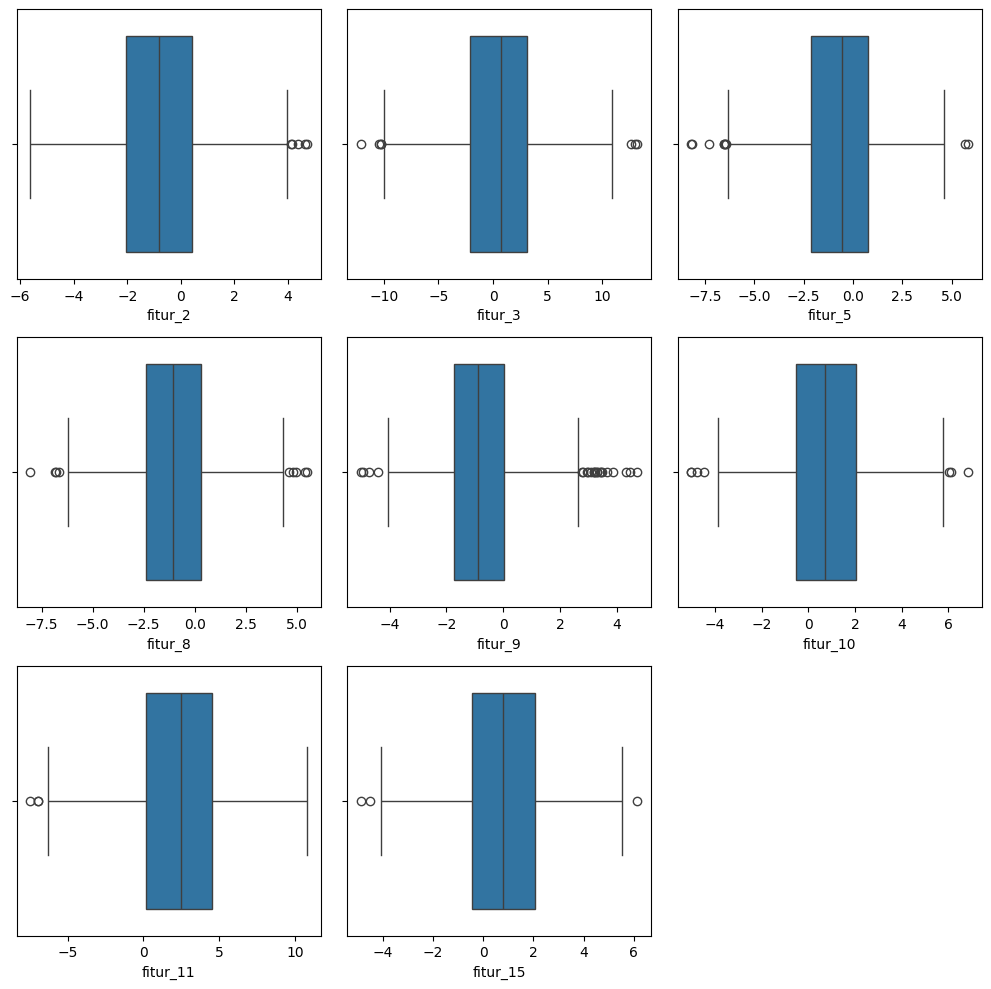

In [177]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(x_cleaned):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=x_cleaned[col])
plt.tight_layout()

In [194]:
q1 = x_important[numeric_columns.columns].quantile(0.25)
q3 = x_important[numeric_columns.columns].quantile(0.75)

iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outlier = ~((x_cleaned[numeric_columns.columns] < lower) | (x_cleaned[numeric_columns.columns] > upper)).any(axis=1)


x_cleaned = x_cleaned.loc[outlier, numeric_columns.columns]
y = y.loc[x_cleaned.index]


In [195]:
x_cleaned

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


In [196]:
len(x_cleaned), len(y)

(949, 949)

In [206]:
len(x_cleaned) == len(y)

True